In [ ]:
# import all usfull libraries.
import seaborn as sns
import pandas as pd # Import pandas library for data manipulation
import numpy as np # Import numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for advanced plotting
import re # Import regular expression library for text manipulation
import string # Import string library for string operations
import nltk # Import nltk library for natural language processing
from nltk.corpus import stopwords # Import stopwords from nltk
from nltk.stem import PorterStemmer # Import PorterStemmer for stemming
from nltk.stem import WordNetLemmatizer # Import WordNetLemmatizer for lemmatizationimport re
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import string
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#data read

data=pd.read_csv("/content/drive/MyDrive/all ml/Diabetes Classification.csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()# top 5cloumns

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [ ]:
data.isna().sum() #checking null values

,0
Age,0
Gender,0
BMI,0
Blood Pressure,0
FBS,0
HbA1c,0
Family History of Diabetes,0
Smoking,0
Diet,0
Exercise,0


In [ ]:
data.shape# to check rows and columns

(128, 11)

In [ ]:
'''plt.figure(figsize=(20, 20))
for i, col in enumerate(data):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()'''

'plt.figure(figsize=(20, 20))\nfor i, col in enumerate(data):\n    plt.subplot(3, 3, i+1)\n    sns.histplot(data[col], kde=True, bins=30, color="blue")\n    plt.title(f"Distribution of {col}")\nplt.tight_layout()\nplt.show()'

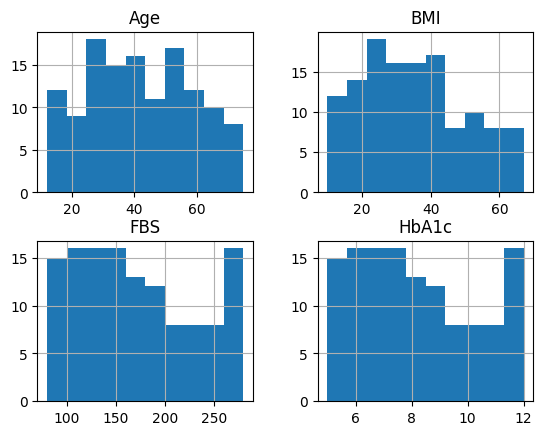

In [ ]:
data.hist()
plt.show()

In [ ]:
# label encoder to convert numarical data


categorical_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


#label_encoder = LabelEncoder()
#data['gender']=le.fit_transform(data['gender'])
#data['Physical_Activity_Level']=le.fit_transform(data['Physical_Activity_Level'])


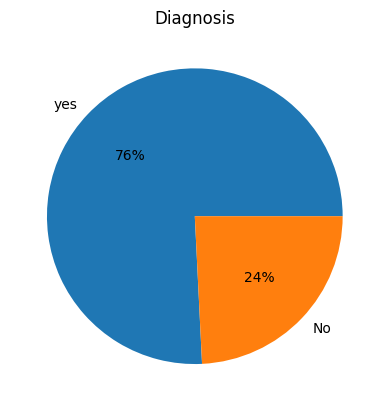

In [ ]:
### Create a plot to display the percentage of the positive and negative  Diagnosis
labels = ['yes', 'No']
values = data['Diagnosis'].value_counts().values
##
plt.pie(values, labels=labels, autopct='%1.0f%%')#,shadow=True use by shadow effect
plt.title('Diagnosis')
plt.show()
##

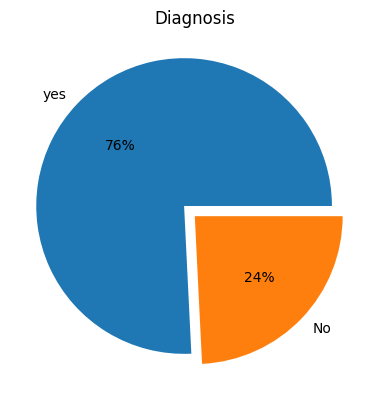

In [ ]:
### Create a plot to display the percentage of the positive and negative  Diagnosis
labels = ['yes', 'No']
values = data['Diagnosis'].value_counts().values
explode=(0.1,0)
plt.pie(values, labels=labels, autopct='%1.0f%%',explode=explode)#,shadow=True use by shadow effect
plt.title('Diagnosis')
plt.show()
##

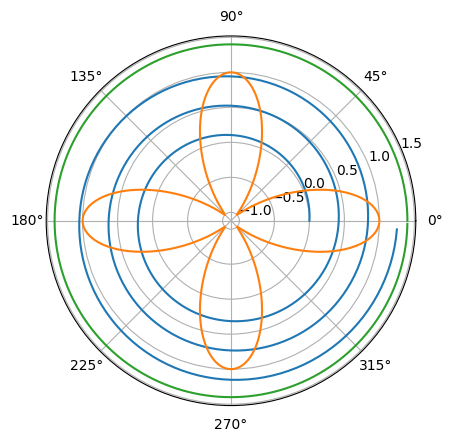

In [ ]:
theta = np.arange(0., 2., 1./180.)*np.pi

plt.polar(3*theta, theta/5);

plt.polar(theta, np.cos(4*theta));

plt.polar(theta, [1.4]*len(theta));

plt.show()

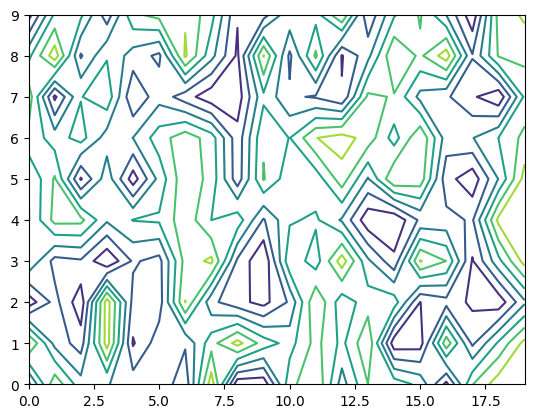

In [ ]:
# Create a matrix
matrix1 = np.random.rand(10, 20)

cp = plt.contour(matrix1)

plt.show()

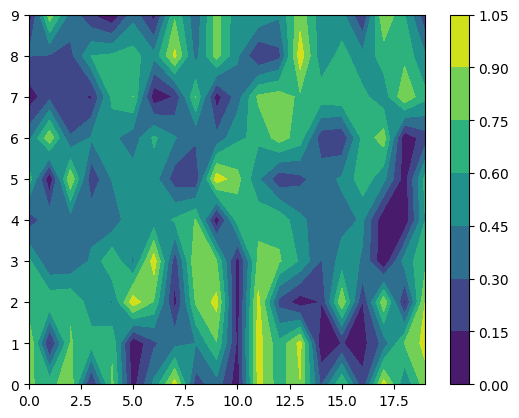

In [ ]:

# Create a matrix (replace with your actual matrix data if available)
matrix1 = np.random.rand(10, 20)

# Create the contourf plot
csf = plt.contourf(matrix1)

# Add a colorbar
plt.colorbar()

#Instead of plt.show(), save the figure to a file
plt.savefig("contourf_plot.png")


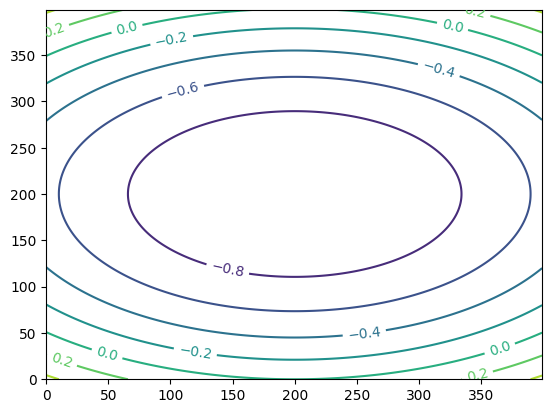

In [ ]:
x13 = np.arange(-2, 2, 0.01)
y13 = np.arange(-2, 2, 0.01)

X, Y = np.meshgrid(x13, y13)

ellipses = X*X/9 + Y*Y/4 - 1

cs = plt.contour(ellipses)

plt.clabel(cs)

plt.show()

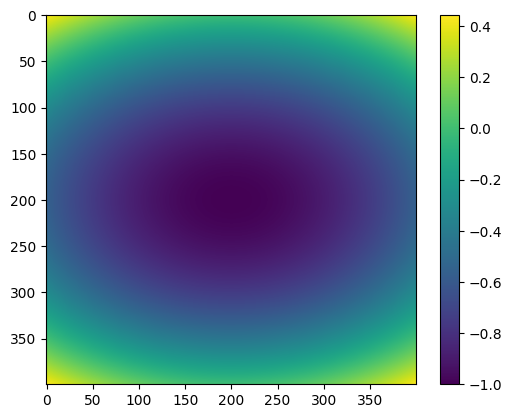

In [ ]:
x13 = np.arange(-2, 2, 0.01)
y13 = np.arange(-2, 2, 0.01)

X, Y = np.meshgrid(x13, y13)

ellipses = X*X/9 + Y*Y/4 - 1

plt.imshow(ellipses);

plt.colorbar();

plt.show()

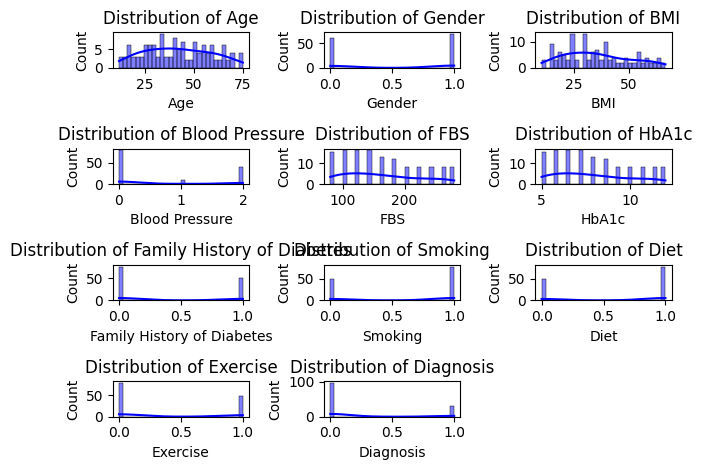

In [ ]:
# plt.figure(figsize=(20, 20))
# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(len(data.columns) / num_cols))  # Calculate rows based on columns

for i, col in enumerate(data):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()





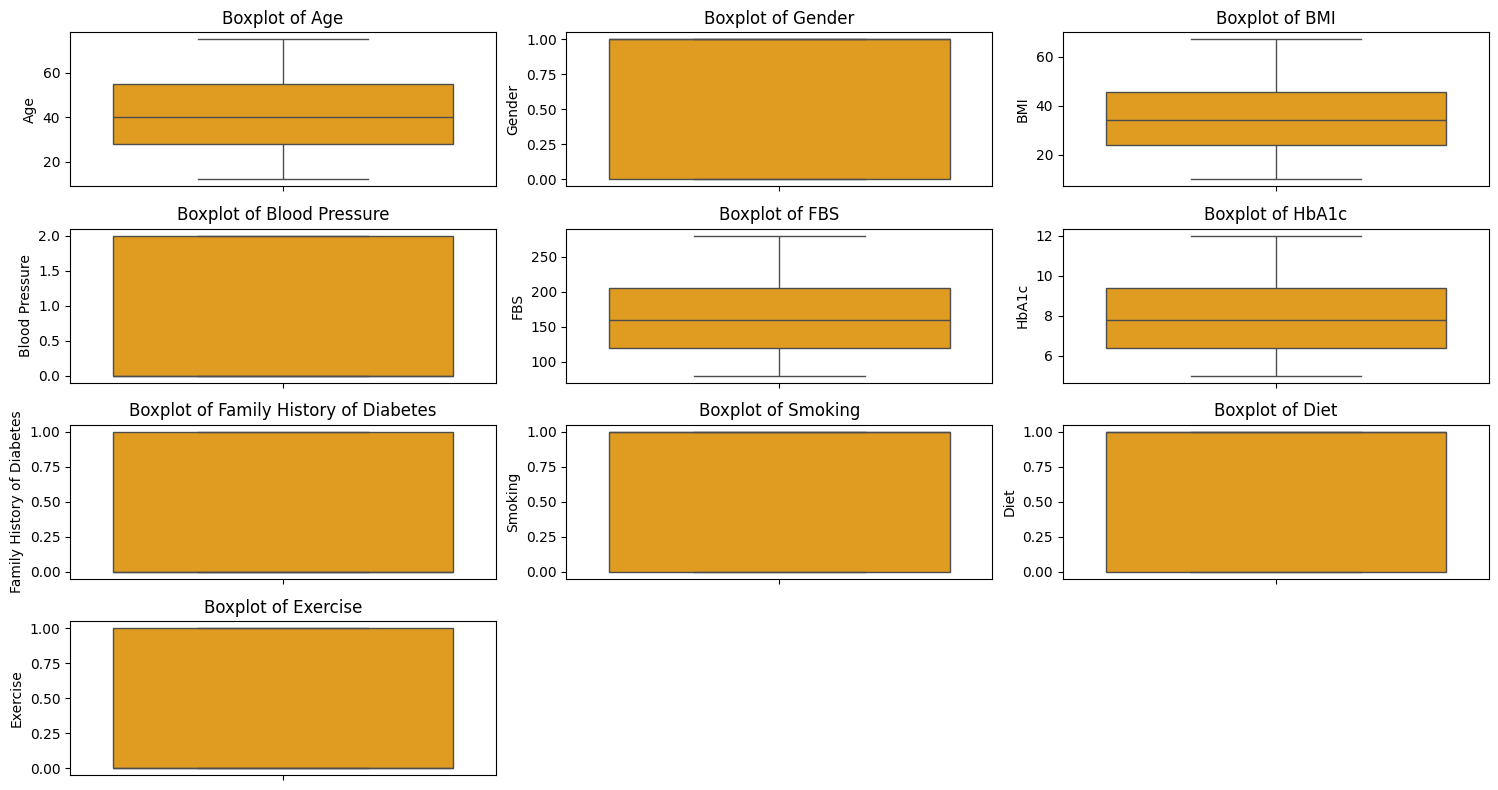

In [ ]:
# plt.figure(figsize=(15, 8))
# for i, col in enumerate(data[:-1]):
#     plt.subplot(3, 3, i+1)
#     sns.boxplot(y=data[col], color="orange")
#     plt.title(f"Boxplot of {col}")
# plt.tight_layout()
# plt.show()




plt.figure(figsize=(15, 8))
# Calculate the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = int(np.ceil(len(data.columns[:-1]) / num_cols))  # Calculate rows based on columns

# Loop through the columns (excluding the last one) and create box plots
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)  # Use calculated rows and columns for subplot placement
    sns.boxplot(y=data[col], color="orange")  # Create a box plot for the current column
    plt.title(f"Boxplot of {col}")  # Set the title of the subplot

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the plot

In [ ]:

data.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25,2,100,5.7,0,0,0,1,0
1,55,0,30,0,120,6.4,1,1,1,0,1
2,65,1,35,0,140,7.1,1,1,1,0,1
3,75,0,40,0,160,7.8,1,1,1,0,1
4,40,1,20,2,80,5.0,0,0,0,1,0


Balanced data refers to a dataset where each class or category in the target variable has an equal (or nearly equal) number of samples. This is especially important in classification problems, where the model learns to distinguish between different classes.

# Why is Balanced Data Important?

In a balanced dataset, the model treats all classes equally because they are represented fairly. This helps the model learn patterns from all classes without being biased toward any particular one.

# Example of Balanced vs. Imbalanced Data:

Balanced Data (Equal Classes):

Spam Emails: 500
Non-Spam Emails: 500
Imbalanced Data (Unequal Classes):

Fraudulent Transactions: 50
Legitimate Transactions: 950
In the imbalanced case, if the model predicts "Legitimate" for everything, it’ll still be 95% accurate, but that’s useless because it misses almost all fraudulent transactions. This is why accuracy isn’t always the best metric for imbalanced datasets.

# How to Handle Imbalanced Data?

# Resampling Techniques:

Oversampling: Increase the number of samples in the minority class (e.g., using SMOTE).
Undersampling: Reduce the number of samples in the majority class.

# Class Weights:

Adjust the model to penalize misclassifications of the minority class more heavily.

Use Better Metrics:

Focus on metrics like Precision, Recall, F1-Score, and ROC-AUC instead of just accuracy.

In [ ]:
# balanced_data = pd.DataFrame()

# # Iterate over each class
# for class_label in data['Diagnosis'].unique():
#     class_data = data[data['Diagnosis'] == class_label]
#     if len(class_data) >= 2000:
#         sampled_data = class_data.sample(n=2000, random_state=42, replace=False)
#     balanced_data = pd.concat([balanced_data, sampled_data])

# # Reset the index of the balanced dataset
# balanced_data.reset_index(drop=True, inplace=True)

# # Display the balanced dataset
# print(balanced_data['Diagnosis'].value_counts())

# data=balanced_data







balanced_data = pd.DataFrame()

# Iterate over each class
for class_label in data ['Diagnosis'].unique():
    class_data =data [data['Diagnosis'] == class_label]
    if len(class_data) >= 100:
        sampled_data = class_data.sample(n=100, random_state=42, replace=False)
    else:
       sampled_data = class_data.sample(n=100, random_state=42, replace=True)

    balanced_data = pd.concat([balanced_data, sampled_data])

# Reset the index of the balanced dataset
balanced_data.reset_index(drop=True, inplace=True)

# Display the balanced dataset
print(balanced_data['Diagnosis'].value_counts())

data=balanced_data

Diagnosis
0    100
1    100
Name: count, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         200 non-null    int64  
 1   Gender                      200 non-null    int64  
 2   BMI                         200 non-null    int64  
 3   Blood Pressure              200 non-null    int64  
 4   FBS                         200 non-null    int64  
 5   HbA1c                       200 non-null    float64
 6   Family History of Diabetes  200 non-null    int64  
 7   Smoking                     200 non-null    int64  
 8   Diet                        200 non-null    int64  
 9   Exercise                    200 non-null    int64  
 10  Diagnosis                   200 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 17.3 KB


In [ ]:
data.shape

(200, 11)

In [ ]:
y=data['Diagnosis']
x=data.drop(columns=['Diagnosis']) #independant  variable or input
#slipt
X_train,X_temp,y_train,y_temp=train_test_split(x, y, test_size=0.4, stratify=y, random_state=0)

X_test, X_cv, y_test, y_cv = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)

In [ ]:
#rmse

def rmse(actual, predicted) :
  return np.sqrt(((actual - predicted) ** 2).mean())

def rmse_to_prob(actual, predicted, max_rmse) :
  rmse_value = rmse(actual, predicted)
  probability = 1 - (rmse_value / max_rmse)

  return max(0, min(probability, 1))

# knn




# When NOT to Use KNN
# New Section
1.When the dataset is very large → Computationally expensive

2. When there are too many irrelevant or noisy features → Affects distance calculations

3.When real-time predictions are required → KNN can be slow at inference time

4. When the data is imbalanced → Can lead to biased predictions

5.Would you like help with implementing KNN in Python or tuning
# hyperparameters like k? 🚀

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



# Predict on the test set and cross-validation set
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.65
0.725
0.65
0.725
0.65
0.725


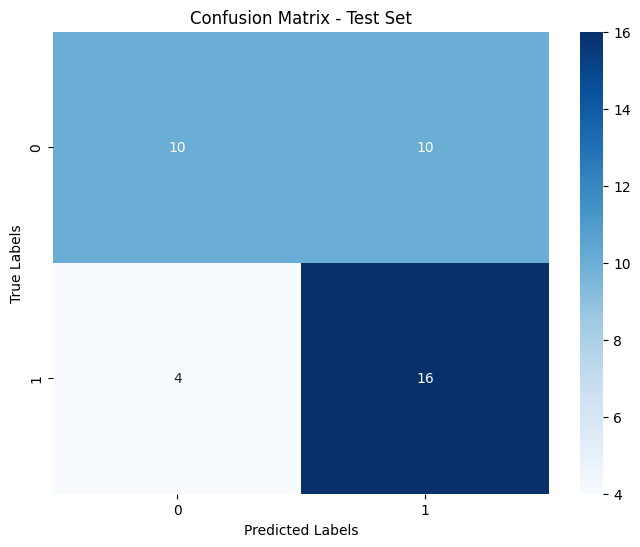

In [ ]:
 #Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



# hyperparameters like k? 🚀

In [ ]:
# Define the range of k values
k = list(range(1, 50, 2))

train_accuracy = []
cv_accuracy = []

# Loop over the range of k values to tune hyperparameter
for i in k:

    knn = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict on train and CV sets
    y_train_pred= knn.predict(X_train)
    y_cv_pred = knn.predict(X_cv)

    # Calculate accuracy
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))


# Find the optimal k based on maximum CV accuracy
optimal_k = k[cv_accuracy.index(max(cv_accuracy))]


# Apply log transformation to k for plotting
k_log = [math.log(x) for x in k]
print(optimal_k)

1


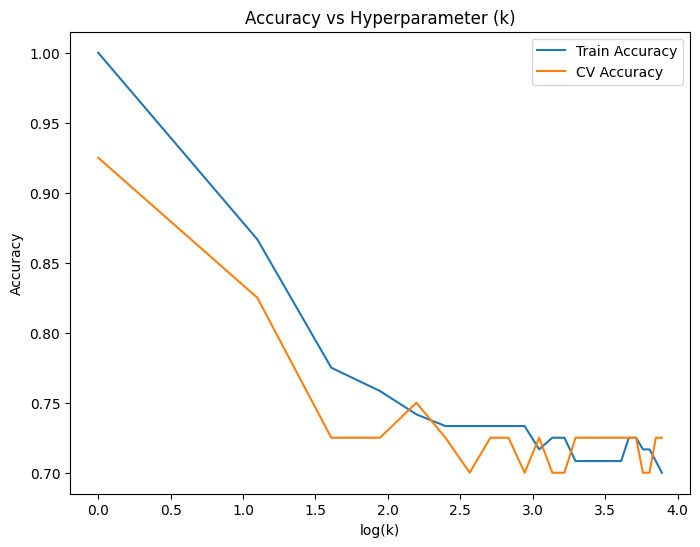

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

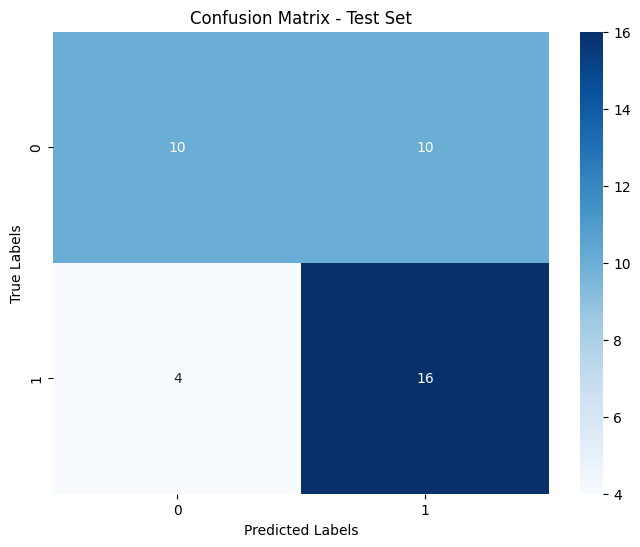

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_train_pred =knn.predict(X_train)
y_test_pred = knn.predict(X_test)
y_cv_pred = knn.predict(X_cv)

# Evaluate the model
train_accuracy_knn= accuracy_score(y_train,y_train_pred)
test_accuracy_knn = accuracy_score(y_test, y_test_pred)
cv_accuracy_knn = accuracy_score(y_cv, y_cv_pred)

train_precision_knn= precision_score(y_train,y_train_pred, average='macro')
test_precision_knn = precision_score(y_test, y_test_pred, average='macro')
cv_precision_knn = precision_score(y_cv, y_cv_pred, average='macro')

train_recall_knn= recall_score(y_train,y_train_pred, average='macro')
test_recall_knn = recall_score(y_test, y_test_pred, average='macro')
cv_recall_knn = recall_score(y_cv, y_cv_pred, average='macro')

max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_knn)
print(test_accuracy_knn)
print(cv_accuracy_knn)
print(train_precision_knn)
print(test_precision_knn)
print(cv_precision_knn)
print(train_recall_knn)
print(test_recall_knn)
print(cv_recall_knn)
print(max_rmse)

1.0
0.875
0.925
1.0
0.9
0.9347826086956521
1.0
0.875
0.925
1


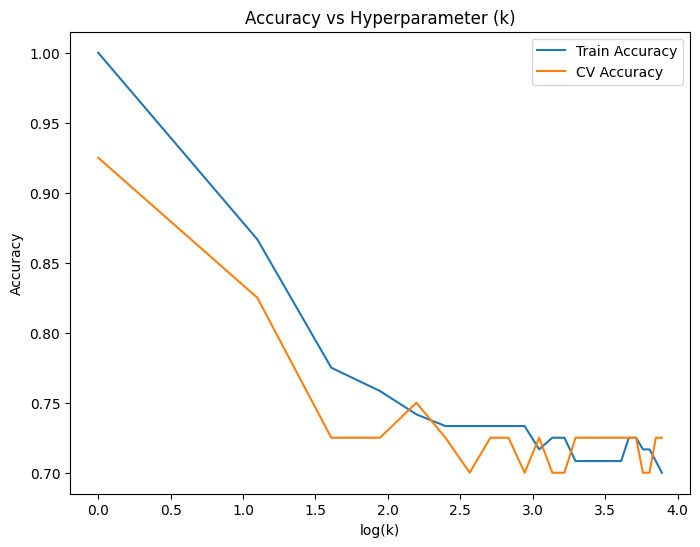

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(k_log, train_accuracy, label='Train Accuracy')
plt.plot(k_log, cv_accuracy, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (k)')
plt.xlabel('log(k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
knn= pd.DataFrame([['KNN',train_accuracy_knn,test_accuracy_knn,cv_accuracy_knn,train_precision_knn,test_precision_knn,cv_precision_knn,train_recall_knn,test_recall_knn,cv_recall_knn,res]],columns=col)
#results.loc[1] = new

In [ ]:

knn

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.0,0.875,0.925,1.0,0.9,0.934783,1.0,0.875,0.925,0.646447


# nave bayes algarithm



When NOT to Use Naïve Bayes
When features are highly correlated → Naïve Bayes assumes independence, which is unrealistic in some cases.

When complex relationships exist in data → Algorithms like decision trees or deep learning may work better.

When feature importance matters → Naïve Bayes treats all features as equally important.

When dataset is imbalanced → Can be biased toward majority classes, requiring additional handling.

In [ ]:
# Train the navie bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = mnb.predict(X_test)
y_cv_pred = mnb.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

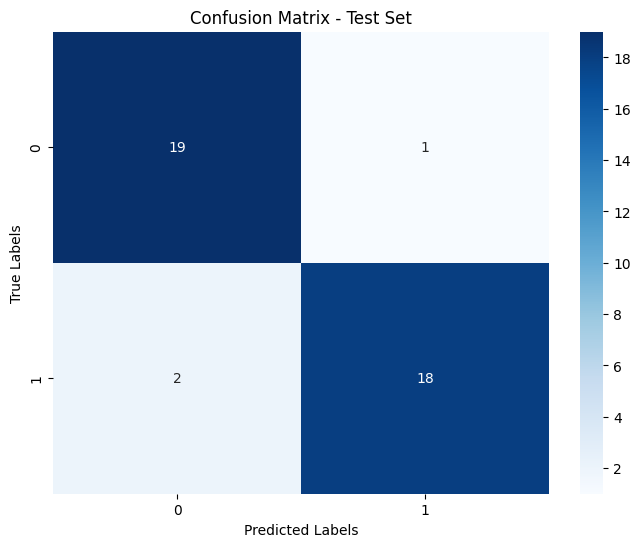

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in alpha:
    clf = MultinomialNB(alpha = i)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

In [ ]:
print(optimal_alpha)

1


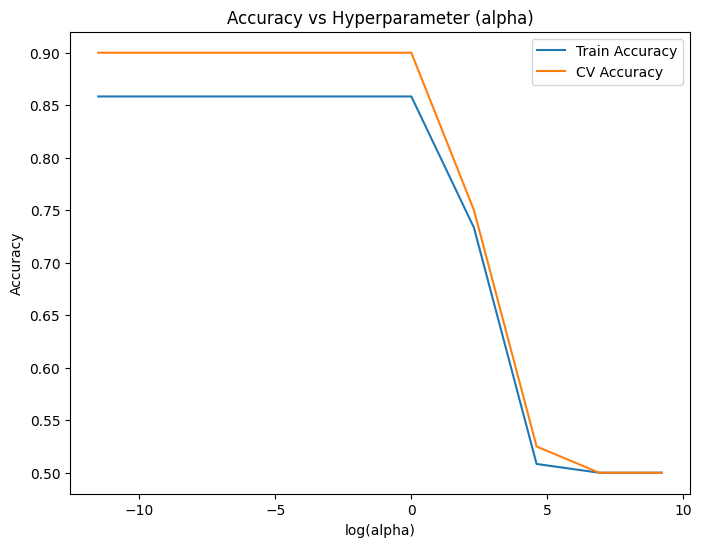

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(alpha, train_auc, label='Train Accuracy')
plt.plot(alpha, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (alpha)')
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

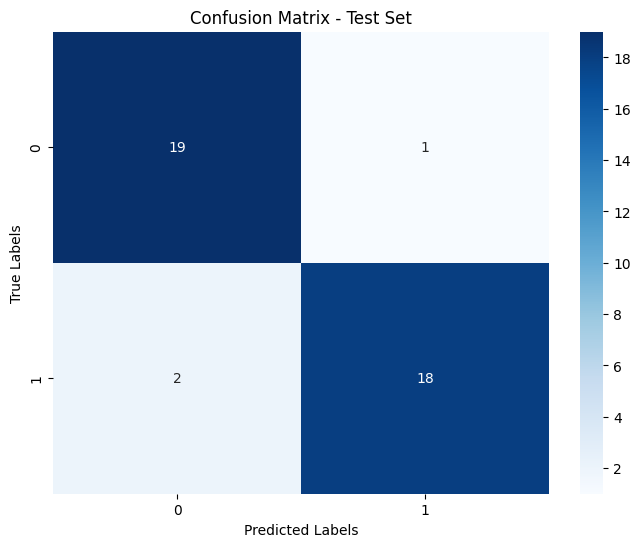

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
clf = MultinomialNB(alpha = optimal_alpha )
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred= clf.predict(X_cv)

# Evaluate the model
train_accuracy_nb= accuracy_score(y_train,y_train_pred)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)
cv_accuracy_nb = accuracy_score(y_cv, y_cv_pred)

train_precision_nb= precision_score(y_train,y_train_pred, average='micro')
test_precision_nb = precision_score(y_test, y_test_pred, average='micro')
cv_precision_nb = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_nb= recall_score(y_train,y_train_pred, average='micro')
test_recall_nb = recall_score(y_test, y_test_pred, average='micro')
cv_recall_nb = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_nb)
print(test_accuracy_nb)
print(cv_accuracy_nb)
print(train_precision_nb)
print(test_precision_nb)
print(cv_precision_nb)
print(train_recall_nb)
print(test_recall_nb)
print(cv_recall_nb)
print(max_rmse)

0.8583333333333333
0.925
0.9
0.8583333333333333
0.925
0.9
0.8583333333333333
0.925
0.9
1


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
nb = pd.DataFrame([['nb',train_accuracy_nb,test_accuracy_nb,cv_accuracy_nb,train_precision_nb,test_precision_nb,cv_precision_nb,train_recall_nb,test_recall_nb,cv_recall_nb,res]],columns=col)
#results.loc[1] = new

In [ ]:
nb

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,nb,0.858333,0.925,0.9,0.858333,0.925,0.9,0.858333,0.925,0.9,0.726139


# Logistic RegressionL1



When to Use Logistic Regression with L1 Regularization (Lasso)
L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator), is used in logistic regression to add a penalty term that encourages sparsity in the model (i.e., reducing coefficients to zero). This makes it particularly useful in the following cases:



# 1. Feature Selection (Sparse Models)
When you have many irrelevant or redundant features, L1 regularization helps by automatically selecting the most important ones.
Example: In genetics, L1-regularized logistic regression can help identify the most influential genes for a disease.



# 2. High-Dimensional Data
When the number of features (p) is much larger than the number of samples (n).
Works well in text classification (e.g., spam detection) where you have thousands of features (words) but relatively few samples.
Example: Sentiment analysis on tweets, where each word is a feature.

# 3. Preventing Overfitting
If your logistic regression model has too many features, it may fit the training data too well but fail on new data.
L1 regularization helps by shrinking coefficients to zero, simplifying the model and reducing overfitting.
Example: Predicting customer churn based on many behavioral metrics.

# 4. Interpretability
If you need a simpler model where only a few important features contribute to the prediction, L1 regularization is better than L2.
Helps in explaining model predictions in industries like finance, healthcare, and legal applications.
Example: In credit risk modeling, L1 can highlight the most crucial financial indicators affecting loan approval.


# When NOT to Use Logistic L1
If features are highly correlated → L1 might randomly drop one feature while keeping another, even if both are important.
If you don’t need feature selection → L2 (Ridge) might be a better choice as it keeps all coefficients small but nonzero.
If you have very small datasets → L1 can aggressively shrink too many coefficients to zero, leading to underfitting.
Would you like help implementing L1-regularized logistic regression in Python (with Scikit-Learn)? 🚀









In [ ]:

# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='l1',solver='liblinear')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

1.0
1.0
1.0
1.0
1.0
1.0


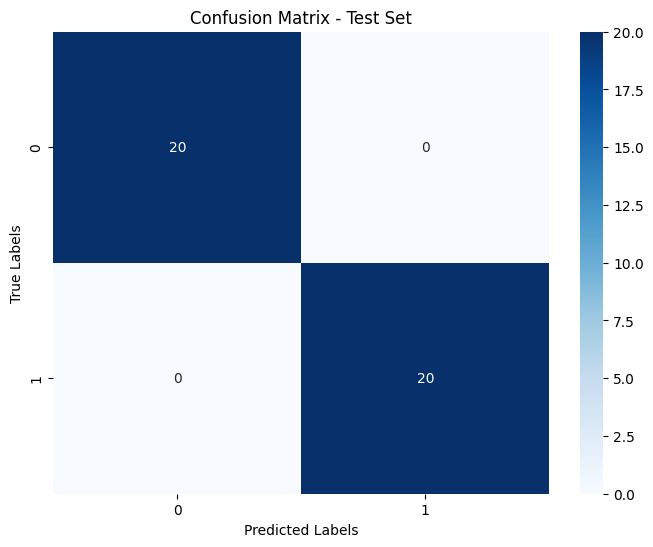

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


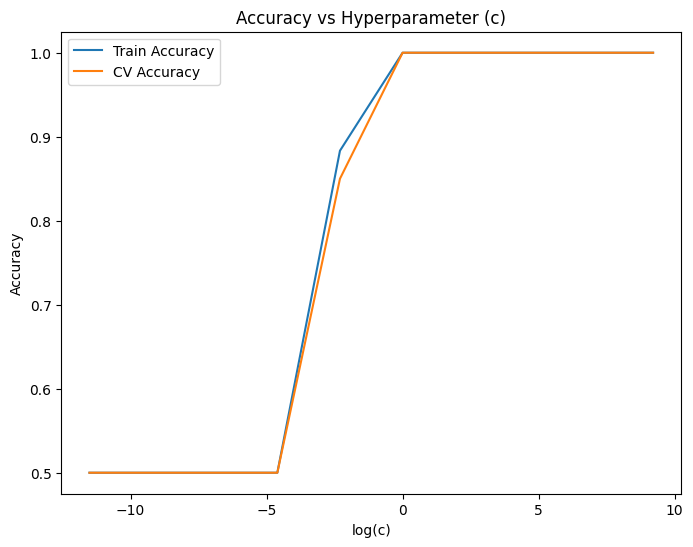

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(penalty='l1',C = optimal_c, solver='liblinear')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred_bow=clf.predict(X_train)
y_test_pred_bow = clf.predict(X_test)
y_cv_pred_bow = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(max_rmse)

0.5
1.0
0.5
0.5
1.0
0.5
0.5
1.0
0.5
1


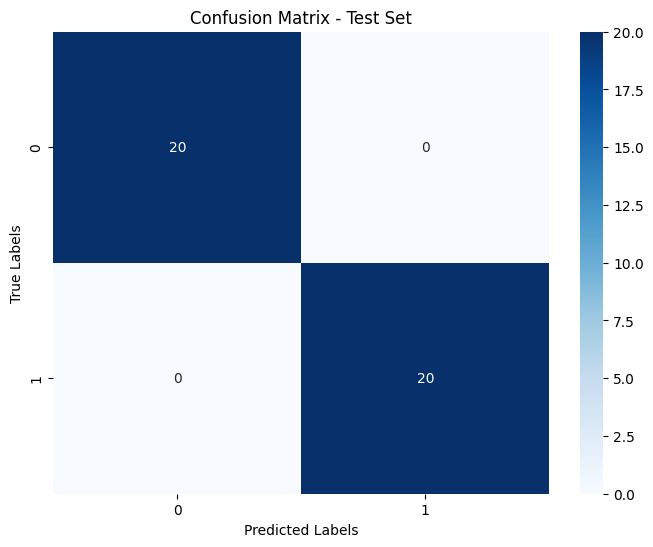

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:


col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']

logl1= pd.DataFrame([['log_l1',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log,max_rmse]],columns=col)

In [ ]:
logl1

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,log_l1,0.5,1.0,0.5,0.5,1.0,0.5,0.5,1.0,0.5,1


# Logistic Regression L2

In [ ]:
# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='l2',solver='liblinear')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.975
1.0
0.975
1.0
0.975
1.0


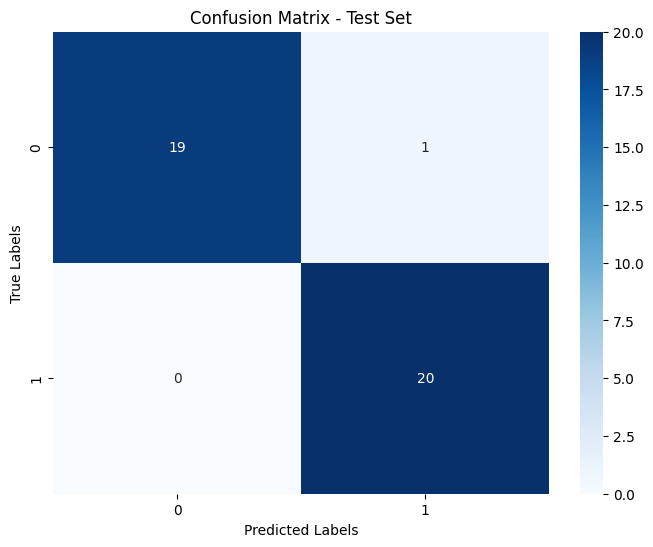

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i,solver='liblinear')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_cv_pred = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


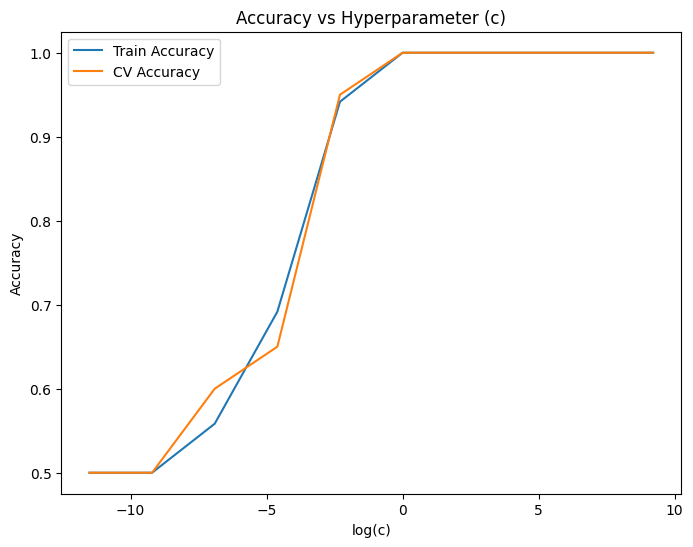

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(penalty='l2',C = optimal_c, solver='liblinear')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse2 = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(max_rmse2)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1


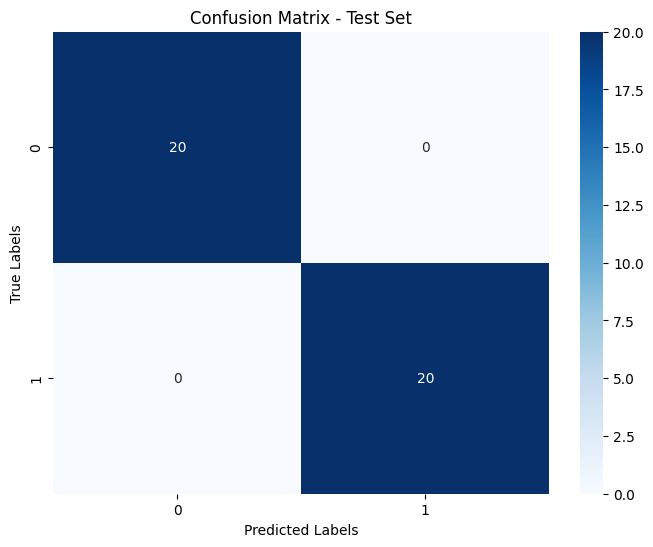

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred_bow)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']



logl2 = pd.DataFrame([['log_l2',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log,max_rmse2]],columns=col)

In [ ]:
logl2

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,log_l2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


# Logistic Regression with Elastic-Net (L1 and L2 combined)

In [ ]:
# Train the Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



log = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.625
0.625
0.625
0.625
0.625
0.625


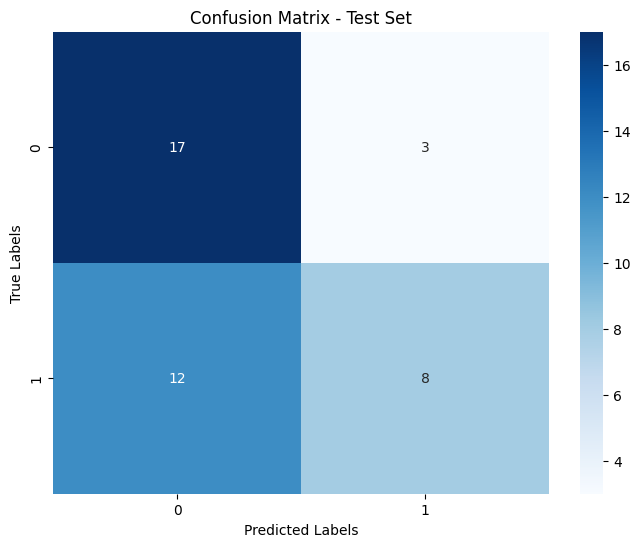

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(C=i,penalty='elasticnet', solver='saga', l1_ratio=0.5)
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


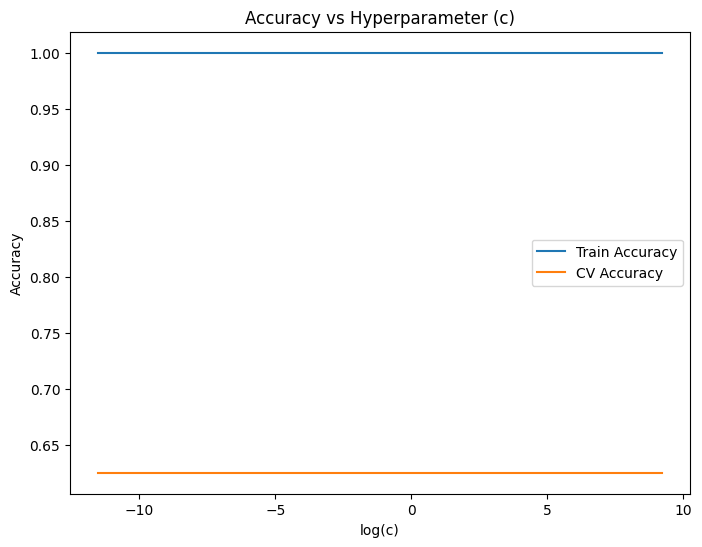

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

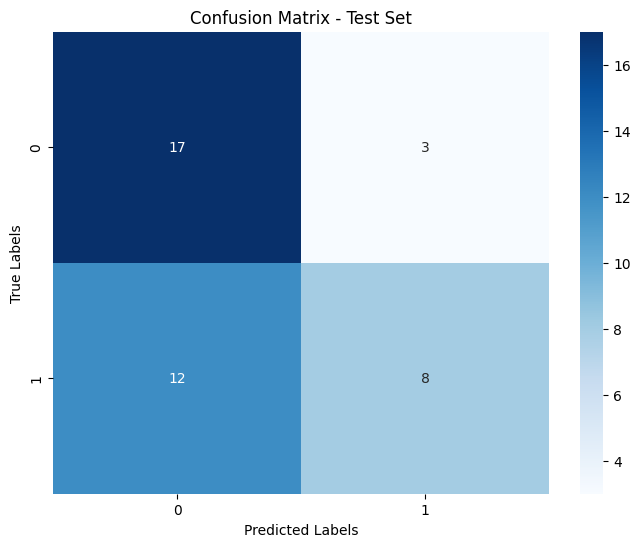

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
clf = LogisticRegression(C = optimal_c,penalty='elasticnet', solver='saga', l1_ratio=0.5)
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(max_rmse)

0.5833333333333334
0.625
0.625
0.5833333333333334
0.625
0.625
0.5833333333333334
0.625
0.625
1


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
logl1andlogl2 = pd.DataFrame([['logl1andlogl2',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log,max_rmse]],columns=col)

In [ ]:
logl1andlogl2

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625,0.583333,0.625,0.625,1


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.875,0.925,1.000000,0.900,0.934783,1.000000,0.875,0.925,0.646447
1,nb,0.858333,0.925,0.900,0.858333,0.925,0.900000,0.858333,0.925,0.900,0.726139
2,log_l1,0.500000,1.000,0.500,0.500000,1.000,0.500000,0.500000,1.000,0.500,1.000000
3,log_l2,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
4,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625000,0.583333,0.625,0.625,1.000000


# linear svm algorithm


I’ve worked with LinearSVM (Support Vector Machine) in various contexts, especially for classification problems where the data is linearly separable or close to it. It’s commonly used for tasks like:

## Text Classification (e.g., spam detection, sentiment analysis)
# Image Recognition (e.g., distinguishing between objects)
# Bioinformatics (e.g., classifying genes or proteins)
# Handwriting Recognition (e.g., digit classification with datasets like MNIST)

It’s great because it’s fast, efficient for high-dimensional data (like text), and works well even when the number of features exceeds the number of samples.

Have you used it for a specific project or are you thinking about applying it to something?









In [ ]:

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC



log = LinearSVC()
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.975
1.0
0.975
1.0
0.975
1.0


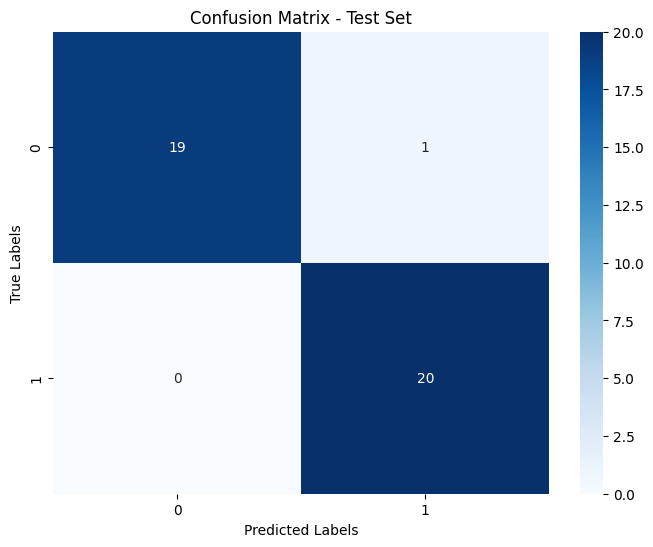

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = LinearSVC(C=i)
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


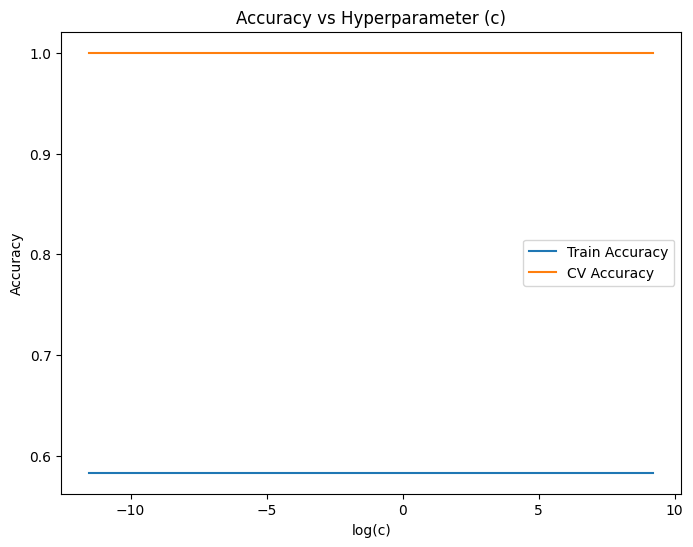

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

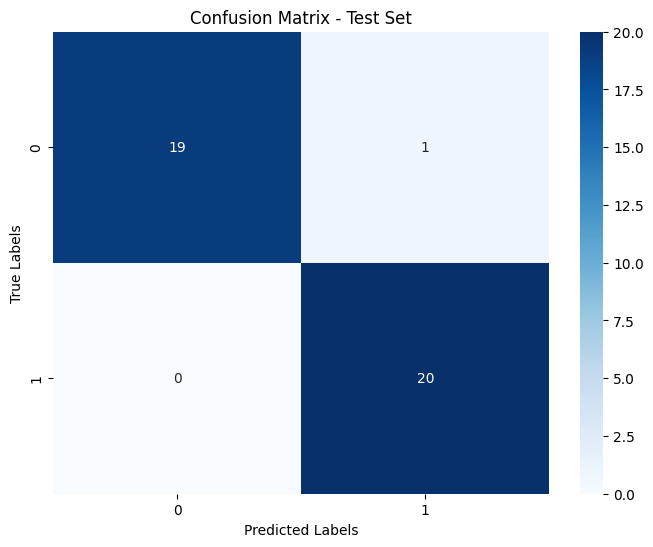

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
clf = LinearSVC(C=optimal_c)
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(max_rmse)

1.0
0.975
1.0
1.0
0.975
1.0
1.0
0.975
1.0
1


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
linearsvm = pd.DataFrame([['linearsvm',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log,max_rmse]],columns=col)

In [ ]:
linearsvm

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,linearsvm,1.0,0.975,1.0,1.0,0.975,1.0,1.0,0.975,1.0,1


# Applying RBF SVM


It sounds like you're referring to LinearRBF, but that’s not a standard term in machine learning. I think you might be mixing two different concepts:

# Linear SVM – Uses a linear kernel to separate data with a straight line (or hyperplane in higher dimensions). It’s simple, fast, and works well when the data is linearly separable.

# RBF SVM –  Uses the Radial Basis Function (RBF) kernel, which is non-linear. This kernel maps data into a higher-dimensional space to handle more complex relationships that aren’t linearly separable. It’s great for datasets where the decision boundary is more curved or intricate.

# If you’re asking about a hybrid or specific implementation, can you clarify? Maybe you're thinking about switching between linear and RBF kernels in SVM for comparison?










In [ ]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf')
log.fit(X_train, y_train)

# Predict on the test set and cross-validation set
y_test_pred = log.predict(X_test)
y_cv_pred = log.predict(X_cv)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

In [ ]:
print(test_accuracy)
print(cv_accuracy)
print(test_precision)
print(cv_precision)
print(test_recall)
print(cv_recall)

0.975
1.0
0.975
1.0
0.975
1.0


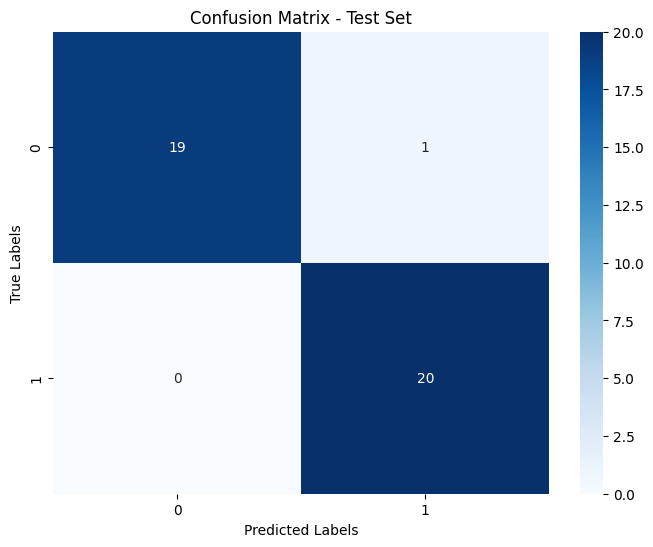

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
c= [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:

    clf = SVC(C=i,kernel='rbf')
    clf.fit(X_train, y_train)

    y_train_pred_bow = clf.predict(X_train)
    y_cv_pred_bow = clf.predict(X_cv)


    train_auc.append(accuracy_score(y_train, y_train_pred))
    cv_auc.append(accuracy_score(y_cv, y_cv_pred))

optimal_c= c[cv_auc.index(max(cv_auc))]
c=[math.log(x) for x in c]

In [ ]:
print(optimal_c)

10000


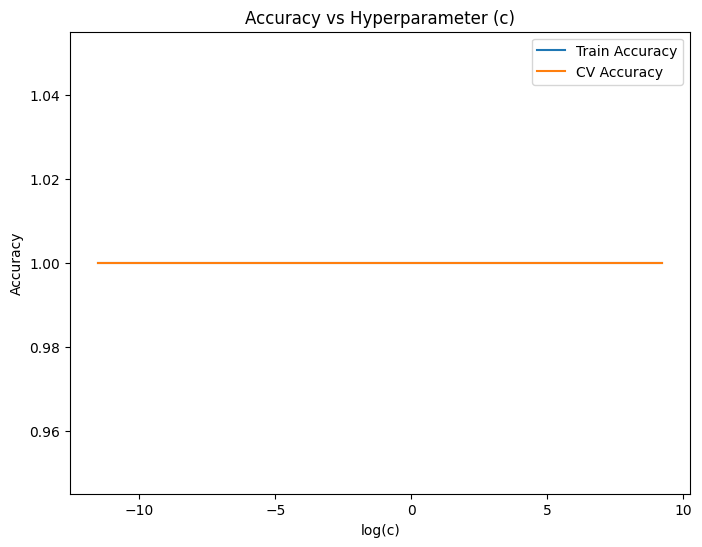

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

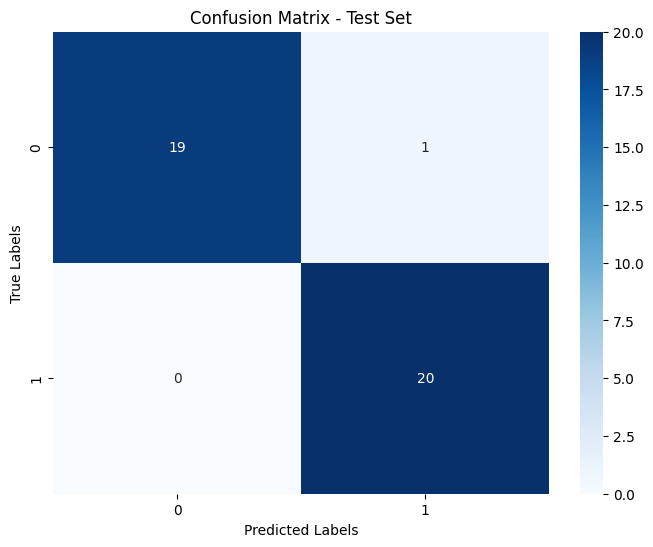

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
clf = SVC(C=optimal_c,kernel='rbf')
clf.fit(X_train, y_train)


# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_log= accuracy_score(y_train,y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
cv_accuracy_log = accuracy_score(y_cv, y_cv_pred)

train_precision_log= precision_score(y_train,y_train_pred, average='micro')
test_precision_log = precision_score(y_test, y_test_pred, average='micro')
cv_precision_log = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_log= recall_score(y_train,y_train_pred, average='micro')
test_recall_log = recall_score(y_test, y_test_pred, average='micro')
cv_recall_log = recall_score(y_cv, y_cv_pred, average='micro')

max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_log)
print(test_accuracy_log)
print(cv_accuracy_log)
print(train_precision_log)
print(test_precision_log)
print(cv_precision_log)
print(train_recall_log)
print(test_recall_log)
print(cv_recall_log)
print(max_rmse)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1


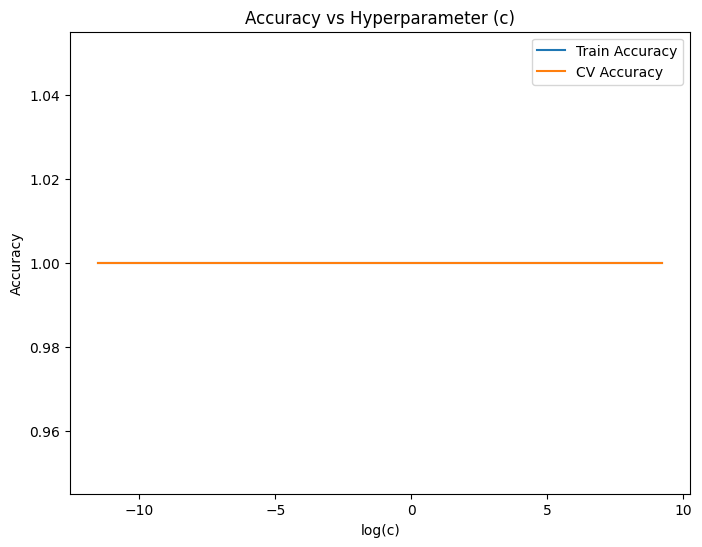

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot(c, train_auc, label='Train Accuracy')
plt.plot(c, cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
RBFSVM = pd.DataFrame([['RBFSVM',train_accuracy_log,  test_accuracy_log, cv_accuracy_log, train_precision_log, test_precision_log,  cv_precision_log, train_recall_log, test_recall_log,cv_recall_log,max_rmse]],columns=col)

In [ ]:
RBFSVM

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,RBFSVM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.875,0.925,1.000000,0.900,0.934783,1.000000,0.875,0.925,0.646447
1,nb,0.858333,0.925,0.900,0.858333,0.925,0.900000,0.858333,0.925,0.900,0.726139
2,log_l1,0.500000,1.000,0.500,0.500000,1.000,0.500000,0.500000,1.000,0.500,1.000000
3,log_l2,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
4,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625000,0.583333,0.625,0.625,1.000000
5,linearsvm,1.000000,0.975,1.000,1.000000,0.975,1.000000,1.000000,0.975,1.000,1.000000
6,RBFSVM,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000


# Applying Decision Tree




I've used Decision Trees in various scenarios, especially when interpretability and simplicity are key. They’re super intuitive since they mimic human decision-making processes. Here are some common cases where they’ve come in handy:

#1.Classification Tasks

Customer Segmentation: Identifying different groups of customers based on purchasing behavior.

Medical Diagnosis: Classifying whether a patient has a certain condition based on symptoms and test results.

Credit Risk Assessment: Deciding if a loan applicant is high-risk based on financial history.

# 2.Regression Tasks

Predicting Housing Prices: Using features like square footage, location, and number of bedrooms.

Sales Forecasting: Estimating future sales based on historical data.

# 3.Feature Selection

Decision trees help identify the most important features in a dataset, which can be super helpful when refining models or reducing dimensionality.

#4. Handling Non-Linear Data

Unlike linear models, decision trees can handle complex datasets where relationships between variables aren’t straightforward.

I’ve also used them as base learners in ensemble methods like Random Forests and Gradient Boosting for even better performance. Have you used them before, or are you thinking of applying them to a project?










In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()

model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train, y_train)

print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal min_samples_split 5
optimal max_depth 5


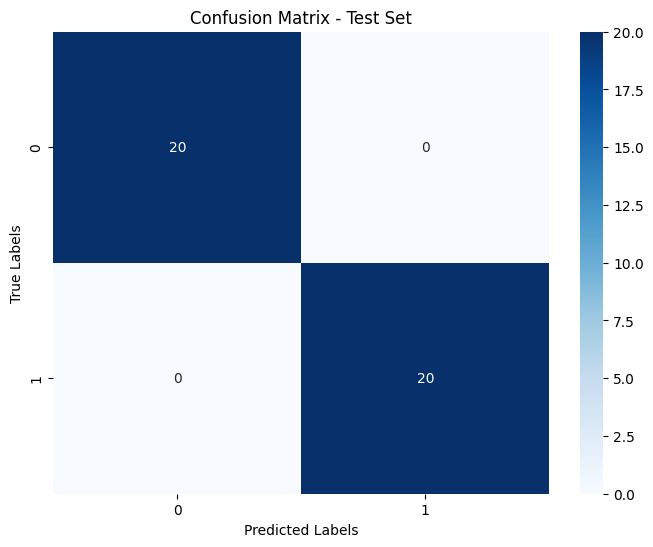

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

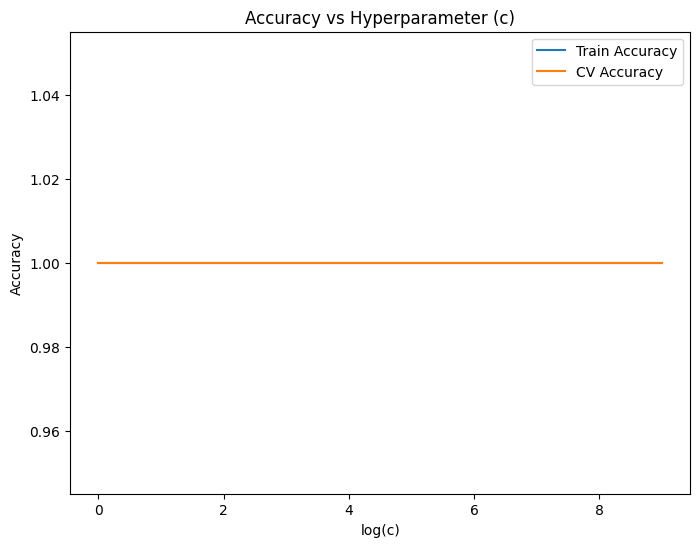

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot( train_auc, label='Train Accuracy')
plt.plot( cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

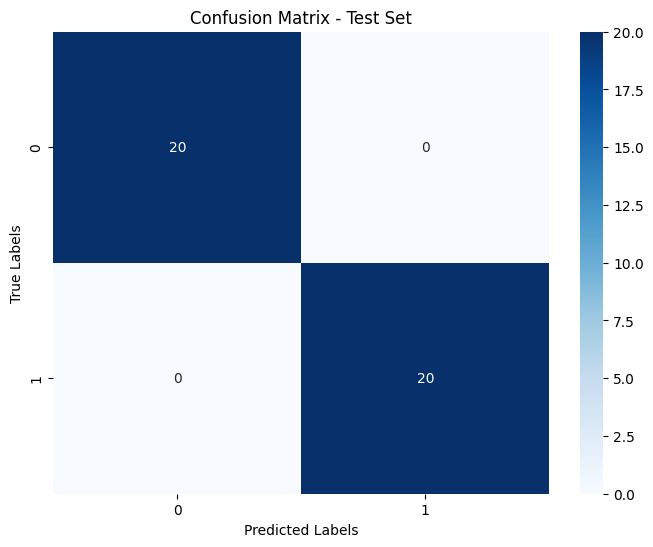

In [ ]:

#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
clf = DecisionTreeClassifier(max_depth = 1,min_samples_split = 5)
clf.fit(X_train,y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_dt= accuracy_score(y_train,y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
cv_accuracy_dt = accuracy_score(y_cv, y_cv_pred)

train_precision_dt= precision_score(y_train,y_train_pred, average='micro')
test_precision_dt = precision_score(y_test, y_test_pred, average='micro')
cv_precision_dt = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_dt= recall_score(y_train,y_train_pred, average='micro')
test_recall_dt = recall_score(y_test, y_test_pred, average='micro')
cv_recall_dt = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_dt)
print(test_accuracy_dt)
print(cv_accuracy_dt)
print(train_precision_dt)
print(test_precision_dt)
print(cv_precision_dt)
print(train_recall_dt)
print(test_recall_dt)
print(cv_recall_dt)
print(max_rmse)

0.7416666666666667
0.8
0.775
0.7416666666666667
0.8
0.775
0.7416666666666667
0.8
0.775
1


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
Decisiontree = pd.DataFrame([['Decisiontree',train_accuracy_dt,  test_accuracy_dt, cv_accuracy_dt, train_precision_dt, test_precision_dt,  cv_precision_dt, train_recall_dt, test_recall_dt,cv_recall_dt,max_rmse]],columns=col)

In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM,Decisiontree],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.875,0.925,1.000000,0.900,0.934783,1.000000,0.875,0.925,0.646447
1,nb,0.858333,0.925,0.900,0.858333,0.925,0.900000,0.858333,0.925,0.900,0.726139
2,log_l1,0.500000,1.000,0.500,0.500000,1.000,0.500000,0.500000,1.000,0.500,1.000000
3,log_l2,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
4,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625000,0.583333,0.625,0.625,1.000000
5,linearsvm,1.000000,0.975,1.000,1.000000,0.975,1.000000,1.000000,0.975,1.000,1.000000
6,RBFSVM,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
7,Decisiontree,0.741667,0.800,0.775,0.741667,0.800,0.775000,0.741667,0.800,0.775,1.000000


# Random Forest


I've used Random Forests in several situations where I needed both high accuracy and robustness. Since Random Forests are ensembles of decision trees, they reduce overfitting and handle both classification and regression tasks really well. Here’s when they’ve been particularly useful:

#1. Classification Tasks

Fraud Detection: Identifying fraudulent transactions by learning from complex patterns in the data.
Spam Filtering: Classifying emails as spam or not based on features like keywords, frequency, and sender info.
Disease Prediction: Predicting the likelihood of diseases based on patient records and lab tests.

# 2.Regression Tasks

Predicting Stock Prices: Using historical data and various financial indicators to predict future trends.

Real Estate Price Estimation: Factoring in location, amenities, and property features to predict housing prices.

# 3.Feature Importance Analysis

Random Forests provide a clear ranking of feature importance, which helps in understanding which variables have the biggest impact on predictions.

# 4.Handling Missing Data & Imbalanced Datasets

Since Random Forests are robust to missing values and can handle imbalanced datasets (with tweaks like class weighting), they’re great for real-world, messy data.

# 5.Recommendation Systems

Building recommendation systems by predicting user preferences based on historical behavior.

What kind of project are you thinking about using Random Forests for?










In [ ]:

from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(X_train, y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)


optimal n_estimators 40
optimal max_depth 5


In [ ]:

optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators


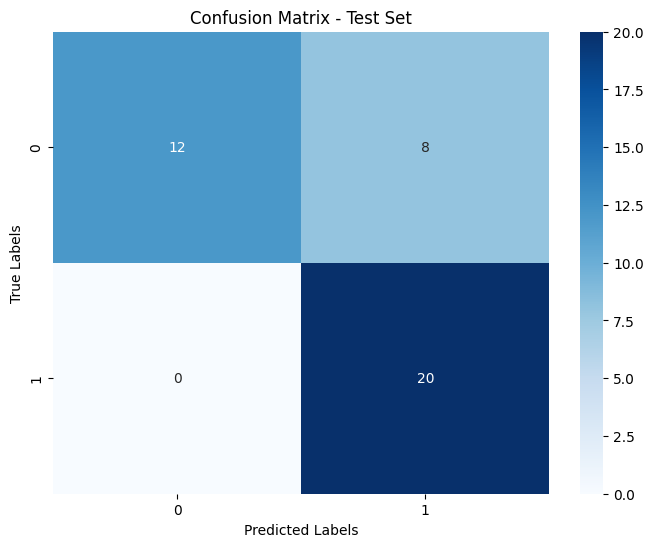

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

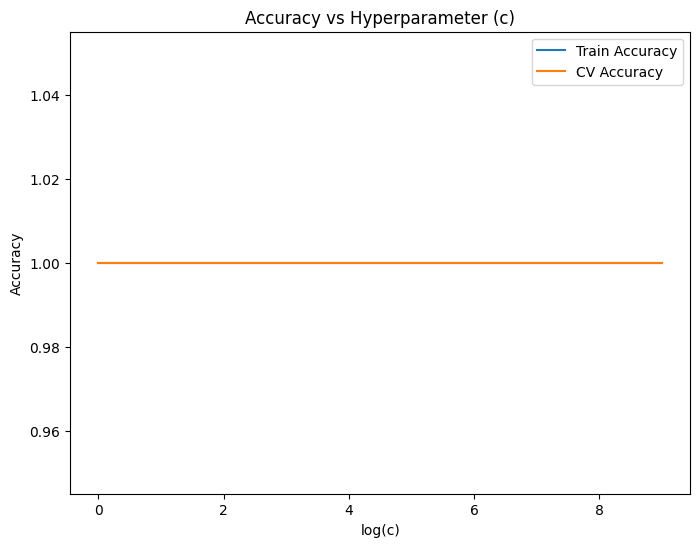

In [ ]:
# Plot accuracy vs log(k)
plt.figure(figsize=(8, 6))
plt.plot( train_auc, label='Train Accuracy')
plt.plot( cv_auc, label='CV Accuracy')
plt.title('Accuracy vs Hyperparameter (c)')
plt.xlabel('log(c)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(X_train, y_train)
# Predict on the test set and cross-validation set
y_train_pred=clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_cv_pred = clf.predict(X_cv)

# Evaluate the model
train_accuracy_rd= accuracy_score(y_train,y_train_pred)
test_accuracy_rd = accuracy_score(y_test, y_test_pred)
cv_accuracy_rd = accuracy_score(y_cv, y_cv_pred)

train_precision_rd= precision_score(y_train,y_train_pred, average='micro')
test_precision_rd = precision_score(y_test, y_test_pred, average='micro')
cv_precision_rd = precision_score(y_cv, y_cv_pred, average='micro')

train_recall_rd= recall_score(y_train,y_train_pred, average='micro')
test_recall_rd = recall_score(y_test, y_test_pred, average='micro')
cv_recall_rd = recall_score(y_cv, y_cv_pred, average='micro')
max_rmse = np.max(y_test)-np.min(y_test)
res =rmse_to_prob(y_test, y_test_pred, max_rmse)

In [ ]:
print(train_accuracy_rd)
print(test_accuracy_rd)
print(cv_accuracy_rd)
print(train_precision_rd)
print(test_precision_rd)
print(cv_precision_rd)
print(train_recall_rd)
print(test_recall_rd)
print(cv_recall_rd)
print(max_rmse)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1


In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
Randomforest = pd.DataFrame([['Randomforest',train_accuracy_rd,  test_accuracy_rd, cv_accuracy_rd, train_precision_rd, test_precision_rd,  cv_precision_rd, train_recall_rd, test_recall_rd,cv_recall_rd,max_rmse]],columns=col)

In [ ]:
Randomforest

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,Randomforest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM,Decisiontree,Randomforest],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.875,0.925,1.000000,0.900,0.934783,1.000000,0.875,0.925,0.646447
1,nb,0.858333,0.925,0.900,0.858333,0.925,0.900000,0.858333,0.925,0.900,0.726139
2,log_l1,0.500000,1.000,0.500,0.500000,1.000,0.500000,0.500000,1.000,0.500,1.000000
3,log_l2,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
4,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625000,0.583333,0.625,0.625,1.000000
5,linearsvm,1.000000,0.975,1.000,1.000000,0.975,1.000000,1.000000,0.975,1.000,1.000000
6,RBFSVM,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
7,Decisiontree,0.741667,0.800,0.775,0.741667,0.800,0.775000,0.741667,0.800,0.775,1.000000
8,Randomforest,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000


In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
#!pip uninstall xgboost -y
#!pip install xgboost==2.1.3 --no-cache-dir
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==1.2.2 --no-cache-dir

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}


model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)

In [ ]:

# Define parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Avoid warnings related to label encoding


print("Optimal hyperparameters:", model.best_params_)

# Train model with optimal hyperparameters
optimal_clf = xgb.XGBClassifier(**model.best_params_, use_label_encoder=False, eval_metric='mlogloss')
optimal_clf.fit(X_train, y_train)

# Predict on train, test, and cross-validation sets
y_train_pred = optimal_clf.predict(X_train)
y_test_pred = optimal_clf.predict(X_test)
y_cv_pred = optimal_clf.predict(X_cv)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_accuracy = accuracy_score(y_cv, y_cv_pred)

train_precision = precision_score(y_train, y_train_pred, average='micro')
test_precision = precision_score(y_test, y_test_pred, average='micro')
cv_precision = precision_score(y_cv, y_cv_pred, average='micro')

train_recall = recall_score(y_train, y_train_pred, average='micro')
test_recall = recall_score(y_test, y_test_pred, average='micro')
cv_recall = recall_score(y_cv, y_cv_pred, average='micro')

# Print and plot the results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Cross-validation Accuracy: {cv_accuracy}")


# Calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))




Optimal hyperparameters: {'max_depth': 10, 'n_estimators': 80}
Train Accuracy: 1.0
Test Accuracy: 1.0
Cross-validation Accuracy: 1.0


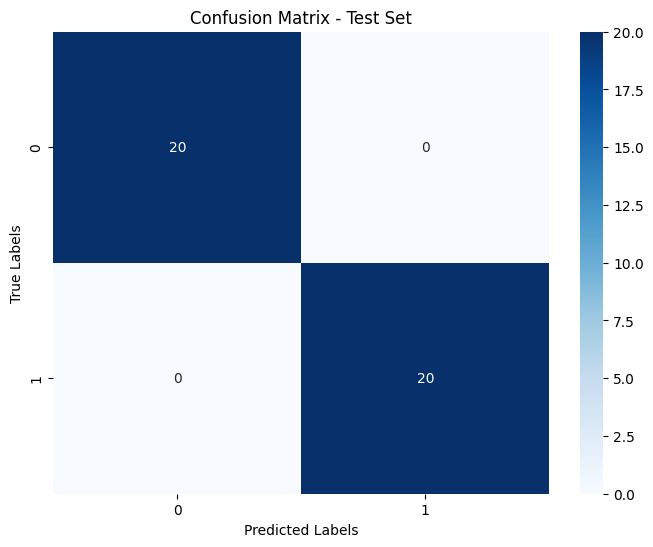

In [ ]:
#Compute the confusion matrix for the test set

cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
col=['Model' , 'Train-Accuracy', 'Test-Accuracy', 'cv_accuracy' ,'train_precision','test_precision','cv_precision','train_recall','test_recall','cv_recall','RMSE']
XGboost = pd.DataFrame([['Xgboost',train_accuracy_rd,  test_accuracy_rd, cv_accuracy_rd, train_precision_rd, test_precision_rd,  cv_precision_rd, train_recall_rd, test_recall_rd,cv_recall_rd,max_rmse]],columns=col)

In [ ]:
XGboost


,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,Xgboost,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [ ]:
result=pd.DataFrame()
result=pd.concat([result,knn,nb,logl1,logl2,logl1andlogl2,linearsvm,RBFSVM,Decisiontree,Randomforest,XGboost
],ignore_index=True)
result

,Model,Train-Accuracy,Test-Accuracy,cv_accuracy,train_precision,test_precision,cv_precision,train_recall,test_recall,cv_recall,RMSE
0,KNN,1.000000,0.875,0.925,1.000000,0.900,0.934783,1.000000,0.875,0.925,0.646447
1,nb,0.858333,0.925,0.900,0.858333,0.925,0.900000,0.858333,0.925,0.900,0.726139
2,log_l1,0.500000,1.000,0.500,0.500000,1.000,0.500000,0.500000,1.000,0.500,1.000000
3,log_l2,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
4,logl1andlogl2,0.583333,0.625,0.625,0.583333,0.625,0.625000,0.583333,0.625,0.625,1.000000
5,linearsvm,1.000000,0.975,1.000,1.000000,0.975,1.000000,1.000000,0.975,1.000,1.000000
6,RBFSVM,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
7,Decisiontree,0.741667,0.800,0.775,0.741667,0.800,0.775000,0.741667,0.800,0.775,1.000000
8,Randomforest,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
9,Xgboost,1.000000,1.000,1.000,1.000000,1.000,1.000000,1.000000,1.000,1.000,1.000000
